**September 17, 2019**  
**ATMOS 5020: Environmental Programming**  
**Brian Blaylock and John Horel**  

> ## Announcment:
> "Check your understanding" due today.

> ## Today's Objective:
> Advanced `matplotlib` concepts, including 2-D plotting, and the `datetime` module.



# Download repository with `git`

We will work with a bit of data today in class. Download everything in the class github repository onto your Desktop by downloading the ZIP file from GitHub, or use the git command:

    cd Desktop
    git clone https://github.com/johnhorel/ATMOS_5020_2019.git
    
For future classes, you can update the contents of the repository if you `cd` into the class directory on your computer

    cd Desktop/ATMOS_5020_2019
    git pull

> Note: Windows users will have to install [git for Windows](https://gitforwindows.org/) and execute the git command from the PowerShell.

In [49]:
import numpy as np
import matplotlib.pyplot as plt

---
---
# Station Meteorological Data
On GitHub, look in the `data` folder for a file called `WBB.csv` and download it. This is weather observations from the William Browning Building. Data was retreived from the [MesoWest download page](https://mesowest.utah.edu/cgi-bin/droman/download_api2.cgi?stn=WBB&year1=2019&day1=17&month1=9&hour1=11&timetype=LOCAL&unit=0)


We want to recreate the figures on the [Mesowest page](https://mesowest.utah.edu/cgi-bin/droman/meso_base_dyn.cgi?stn=WBB&unit=0&time=LOCAL&product=&year1=&month1=&day1=00&hour1=00&hours=24&graph=1&past=0&order=1) from the raw data:


![](./images/wbb_temprh.png)


Open the `.csv` file in the Jupyter Lab environment to see the column contents and the units.

There are many ways we can read this data into Python. Let's use the Pandas method like we learned last class.

In [2]:
import pandas as pd

In [3]:
# Load the data. 
# Why do we skip these rows?
WBB = pd.read_csv('./data/WBB.csv', skiprows=[0,1,2,3,4,5,7])

In [4]:
WBB.head()

,Station_ID,Date_Time,pressure_set_1,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,wind_cardinal_direction_set_1d,altimeter_set_1d
0,WBB,09/16/2019 11:00 MDT,25.11,78.62,26.97,19.82,190.0,27.63,S,29.96
1,WBB,09/16/2019 11:01 MDT,25.11,78.62,27.05,17.07,191.6,20.60,SSW,29.96
2,WBB,09/16/2019 11:02 MDT,25.11,78.69,27.04,17.00,195.5,25.43,SSW,29.96
3,WBB,09/16/2019 11:03 MDT,25.11,78.80,26.93,19.04,190.1,26.08,S,29.96
4,WBB,09/16/2019 11:04 MDT,25.11,78.69,26.61,22.55,189.8,29.15,S,29.96


In [5]:
# Look at air temperature. 
# What are the units? (This is one of the rows we skipped in the file.)
WBB['air_temp_set_1'].head()

0    78.62
1    78.62
2    78.69
3    78.80
4    78.69
Name: air_temp_set_1, dtype: float64

In [50]:
# Look at the Datetime
WBB['Date_Time'].head()

0    09/16/2019 11:00 MDT
1    09/16/2019 11:01 MDT
2    09/16/2019 11:02 MDT
3    09/16/2019 11:03 MDT
4    09/16/2019 11:04 MDT
Name: Date_Time, dtype: object

Plot the data on a simple plot...

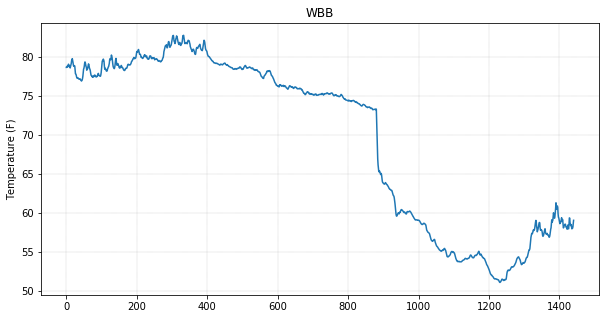

In [7]:
# Create variable for easy access to temperature data from dataframe
air_temp = WBB['air_temp_set_1']

plt.figure(figsize=[10,5])
plt.plot(air_temp)

plt.ylabel('Temperature (F)')
plt.title('WBB')

plt.grid(linestyle='--', color='grey', linewidth=.2)

## Exercise: Create a new graph with relative humidity and temperature on the same graph:
- make the RH line green
- make the temperature line red

<br><br>

---

There are two problems with the plot we just made:
1. The x axis is numbered by data points. We want dates on that axis.
1. Ploting temperature and relative humidity is ok for this case, but the units are different (F vs. %). It would be nice to have two different y-axes


Aaron showed us last class that we can plot dates on the xaxis as shown below. Today, we will also learn how to do this with the `datetime` module.

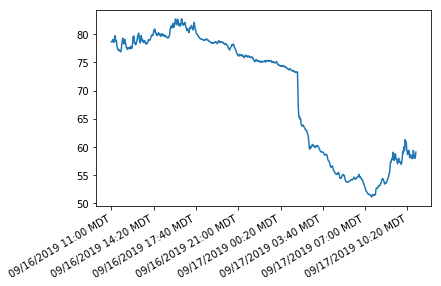

In [59]:
plt.plot(WBB['Date_Time'], air_temp)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10)) #set the number of x axis ticks. (without this it will plot every tick mark)
plt.gcf().autofmt_xdate() #get a nice date format for the x axis (makes it look neat)

# 🗓 Datetime (chapter 17.3)

The `Date_Time` variable is a list of strings! It would be really nice to convert those dates to something Python understood as dates.

Fortunatly, Python has some built-in tools for converting strings to `datetime` objects. You were introduced to this module in the "Check Your Understanding."

[Reference: Python datetime string formater](https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior)

In [8]:
# Import Python's datetime module
from datetime import datetime

In [9]:
# Create a datetime object
datetime(2019, 4, 1, 1)

datetime.datetime(2019, 4, 1, 1, 0)

In [10]:
# Convert a datetime object to a string
datetime.strftime(datetime(2019, 4, 1, 1),'%Y %b %d %H:%M')

'2019 Apr 01 01:00'

In [11]:
# Convert a string to a datetime object
str_date = '2019-09-17'
datetime.strptime(str_date, '%Y-%m-%d')

datetime.datetime(2019, 9, 17, 0, 0)

## Exercise: Convert string dates in our file
1. Get the first date in our our data.
1. What is the Date string format in our data?
1. Look at the datetime docs to see how the string date should be formatted.
1. Convert the first string date to a python datetime object.

In [12]:
WBB['Date_Time'][0]






'09/16/2019 11:00 MDT'

---

<br><br>

To convert all the values in the our dates list, we will use a condensed `for loop` or [list comprehensions](https://www.digitalocean.com/community/tutorials/understanding-list-comprehensions-in-python-3). 

We can use list comprehension to convert all the values in the list `dates`.

    new_list = [x for x in iterable]

In [13]:
# List comprehension example: convert all items in a list to upper case
old_list = ['hi', 'bye', 'stop', 'go']
print(old_list)

new_list = [x.upper() for x in old_list]
print(new_list)

['hi', 'bye', 'stop', 'go']
['HI', 'BYE', 'STOP', 'GO']


In [14]:
# Use a list comprehension to convert the string dates to datetime objects
# I typically use lowercase `dates` to name dates as strings
# and uppercase `DATES` to name dates as datetime objects

dates = WBB['Date_Time']

DATES = np.array([datetime.strptime(i, '%m/%d/%Y %H:%M MDT') for i in dates])

## Question: What is the difference between `dates` and `DATES`?
- What are the types of each variable? `dates[0]` vs. `DATES[0]`

---
Now that we have the dates in a python-readable format, we can plot our weather observations against temperature.


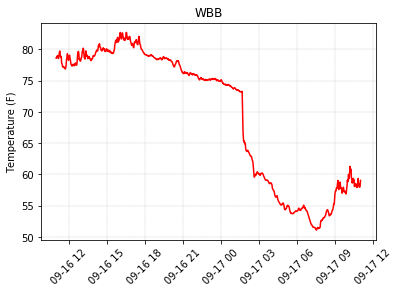

In [15]:
plt.plot(DATES, air_temp, color='red')

plt.ylabel('Temperature (F)')
plt.title('WBB')

plt.xticks(rotation=45)

plt.grid(linestyle='--', color='grey', linewidth=.2)

Do some google searches to find out how to format the dates on the xaxis...below is the general method...  
https://stackoverflow.com/questions/14946371/editing-the-date-formatting-of-x-axis-tick-labels-in-matplotlib

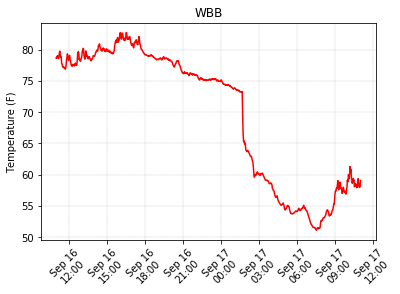

In [16]:
plt.plot(DATES, air_temp, color='red')

plt.ylabel('Temperature (F)')
plt.title('WBB')

plt.xticks(rotation=45)

plt.grid(linestyle='--', color='grey', linewidth=.2)

# Ask Google: "matplotlib format xaxis datetime"
# Note: plt.gca() means "get current axes", which is often useful for cusomizing things.
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%b %d\n%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

## Twin Axis

**Use matplotlib the _Customizable_ way**

What if we want to plot Temperature and Relative Humidity on the same plot...

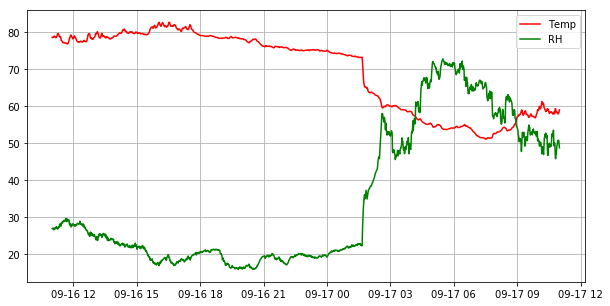

In [17]:
plt.figure(figsize=[10,5])
plt.plot(DATES, air_temp, 'r', label='Temp')
plt.plot(DATES, WBB['relative_humidity_set_1'], 'g', label="RH")
plt.legend()
plt.grid()

This is fine, but the temperature and humidity range of values are not similar. Wouldn't it be nice if there were two different y axes? We can accomplish this with a little bit more formatting.

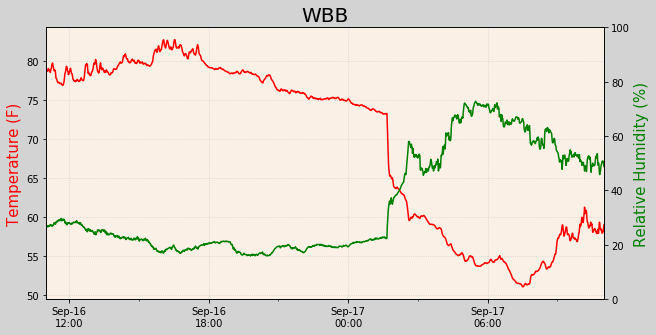

In [18]:
# Explicitly create the `fig` and `ax1` figure objects
fig, ax1 = plt.subplots(figsize=[10,5], facecolor='lightgrey')

# Plot Temperature on ax1
ax1.plot(DATES, air_temp, 'r')
ax1.set_ylabel('Temperature (F)', color='r', fontsize=15)

# Create ax2 and plot Relative Humidity
ax2 = ax1.twinx() # make ax2 share the x axis
ax2.plot(DATES, WBB['relative_humidity_set_1'], 'g')
ax2.set_ylabel('Relative Humidity (%)', color='g', fontsize=15)
ax2.set_ylim([0,100])

# Add a title
plt.title('WBB', fontsize=20)

# Modify date axis format. 
# You can learn how to do this with some internet searches.
from matplotlib.dates import DateFormatter, HourLocator
ax1.xaxis.set_major_formatter(DateFormatter('%b-%d\n%H:%M'))
ax1.xaxis.set_major_locator(HourLocator(range(0,24,6)))
ax1.xaxis.set_minor_locator(HourLocator(range(0,24,3)))

ax1.grid(linestyle=':', alpha=.5) # alpha is transparency

ax1.set_facecolor('linen')

# Set the xlim as the first and last date
plt.xlim(DATES[0], DATES[-1]);

# To save the figure, uncomment the next line
#plt.savefig('my_wbb_figure')

---
---

# 2-D Plots in `matplotlib.pyplot` (Chapter 12)

**Objective**: Learn to visualizing 2-dimensional datasets with `matplotlib`.

The best way to learn how to make matplotlib graphics (and programing in general) is to see how something is done, try it yourself, read the documentation, and then make some change to do what you want. If you don't know how to do something, Google it. 99% of the time someone else had the exact same question.

You might hear the term **raster** a lot. Raster simply refers to an image that represents a 2D dataset. The two images above are rasters.

To start off, become familiar with a few basic methods for plotting 2D data. We will practice with a small 2D array of random data.

Reference: [numpy.random.random](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random.html)  

### Generate Random Data

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Generate some random 2D data (random numbers between 0 and 1).
rand = np.random.random([5,5])

print('Random array shape:', np.shape(rand))
print(rand)

Random array shape: (5, 5)
[[0.02846281 0.24509238 0.97632802 0.44909882 0.80514076]
 [0.40094264 0.89809564 0.5006554  0.22787008 0.46817987]
 [0.03142607 0.21461834 0.21236672 0.09844659 0.90562436]
 [0.92644146 0.96091921 0.70072531 0.39411454 0.41341767]
 [0.85488073 0.61188779 0.55413955 0.52456142 0.71210988]]


### Generate Rasters with `imshow` and `pcolormesh`

`plt.imshow()` and `plt.pcolormesh()` are two methods to create a raster image of 2D data. They assigns a color for every value in the 2D grid. The two are slightly different. `imshow()` can plot RGB arrays and `pcolormesh` can plot irregularly spaced grids. Don't worry too much about the differences for now.

The default color scale is [viridis](https://www.youtube.com/watch?time_continue=147&v=xAoljeRJ3lU), but this can be changed with the `cmap=` argument. 

Reference: [matplotlib color map names](https://matplotlib.org/examples/color/colormaps_reference.html)  
Note: to reverse the color map, add `_r` to the end the name. For example, to reverse `cmap='Blues'` you would do `cmap='Blues_r'`

Immediately after the `plt.imshow()` function, you can add a colorbar with `plt.colorbar()`

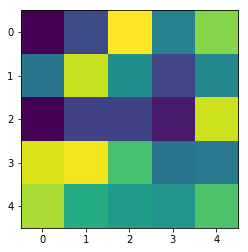

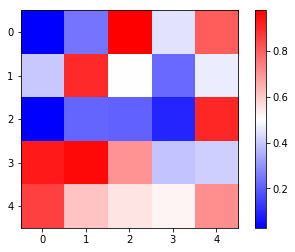

In [21]:
# Plot data with imshow
plt.figure(1)
plt.imshow(rand)

# Use a different color map and add a colorbar
plt.figure(2)
plt.imshow(rand, cmap='bwr')
plt.colorbar()

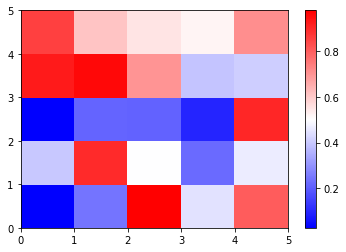

In [22]:
# Plot data with pcolormesh
plt.pcolormesh(rand, cmap='bwr')
plt.colorbar()

# notice how pcolormesh and imshow are upside-down from each other (look at the y axis)

### Generate Contour Plots and Filled Contours
Contours are lines of equal value, just like a topographic map. It doesn't look too pretty for a random dataset, but you'll see how useful it is later.

Contours can be lines `plt.contour()` or filled contours `plt.contourf()`. You can specify which levels to contour with the `levels=` argument.

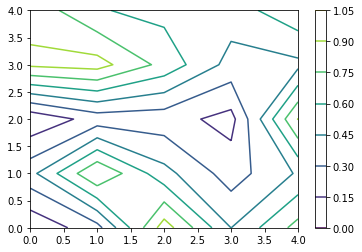

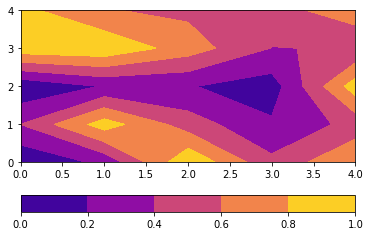

In [61]:
# Plot data with contours
plt.figure(1)
plt.contour(rand)
plt.colorbar()

# Color fill for specific levels and add a *horizontal* colorbar
plt.figure(2)
plt.contourf(rand, levels=np.arange(0,1.2,.2), cmap='plasma')
plt.colorbar(orientation='horizontal')

### Generate Wind Barbs
Wind barbs are one way to display vector data. In the case of wind, there is an east-west component (U) and north-south component (V). The number of flags corresponds to the wind's speed and points in the direction the wind is blowing.

(-1, 5)

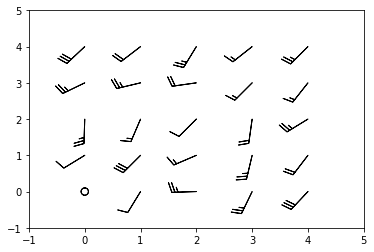

In [63]:
# Wind barbs (U and V compoents). V is transposed for visual effect
plt.barbs(rand*25, np.transpose(rand*25))

plt.xlim([-1,5])
plt.ylim([-1,5])

---

<img src='./images/HRRR.png' width=288 align='right' style='padding-left:30px'>

# HRRR Weather Model Data: Hurricane Humberto
I prepared some HRRR model data and stored it in the `data/HRRR_data` folder. These are dictionaries saved as numpy binary files. To load the dictionary from the file:

    varName = np.load('data/HRRR_data/Temp_2m.npy', allow_pickle=True).item(0)

In [25]:
# 2 meter temperature
T = np.load('data/HRRR_data/Temp_2m.npy', allow_pickle=True).item(0)

In [26]:
# Look at the contents of T
T

{'value': array([[297.12048, 297.12048, 297.12048, ..., 301.93298, 301.93298,
         301.93298],
        [297.12048, 297.12048, 297.12048, ..., 301.87048, 301.87048,
         301.87048],
        [297.12048, 297.18298, 297.18298, ..., 301.87048, 301.87048,
         301.87048],
        ...,
        [289.18298, 289.18298, 289.18298, ..., 282.37048, 282.43298,
         282.49548],
        [289.18298, 289.18298, 289.18298, ..., 282.37048, 282.37048,
         282.43298],
        [289.18298, 289.18298, 289.18298, ..., 282.30798, 282.37048,
         282.37048]], dtype=float32),
 'lat': array([[21.138123  , 21.14511004, 21.1520901 , ..., 21.1545089 ,
         21.14753125, 21.14054663],
        [21.16299459, 21.1699845 , 21.17696744, ..., 21.17938723,
         21.1724067 , 21.16541921],
        [21.18786863, 21.19486142, 21.20184723, ..., 21.20426802,
         21.19728462, 21.19029425],
        ...,
        [47.78955926, 47.799849  , 47.81012868, ..., 47.81369093,
         47.80341474, 47.7931

In [27]:
T.keys()

dict_keys(['value', 'lat', 'lon', 'fxx', 'valid', 'anlys', 'msg', 'name', 'units', 'level', 'URL', 'cURL'])

In [28]:
T['units']

'K'

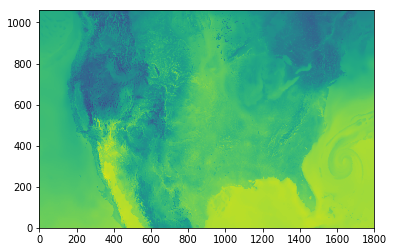

In [29]:
# Make a basic plot of Temperature
# Is there a better colormap to depict temperatures?
plt.pcolormesh(T['value'])

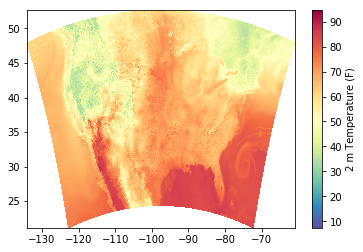

In [30]:
# Make a plot of Temperature in F, with latitude and longitude on axis
T_c = T['value']-273.15
T_f = 9/5*T_c + 32

plt.pcolormesh(T['lon'], T['lat'], T_f, cmap='Spectral_r')
plt.colorbar(label='2 m Temperature (F)')

## Exercise: Make a figure showing wind gust
- Load and plot the data. Use a colormap that isn't the default (https://matplotlib.org/examples/color/colormaps_reference.html)
- What is the maximum gust?
- Where is the maximum gust located?
- Add a star to indicate the location of the maximum wind gust (use `plt.scatter()`).

In [31]:
# make the plot









In [32]:
# what is the maximum gust?



# where is the maximum gust?


# Add a star to the figure showing where the maximum wind gust occurs with plt.scatter()





---

Additional demonstration:

In [33]:
LAND = np.load('data/HRRR_data/Land_Mask.npy', allow_pickle=True).item(0)

# Mean Sea Level Pressure (in Pascales)
MSLP = np.load('data/HRRR_data/MSLP.npy', allow_pickle=True).item(0)

# Convert the value of MSLP to hPa
MSLP['value'] /= 100

# 500 mb height
HGT500 = np.load('data/HRRR_data/HGT_500mb.npy', allow_pickle=True).item(0)

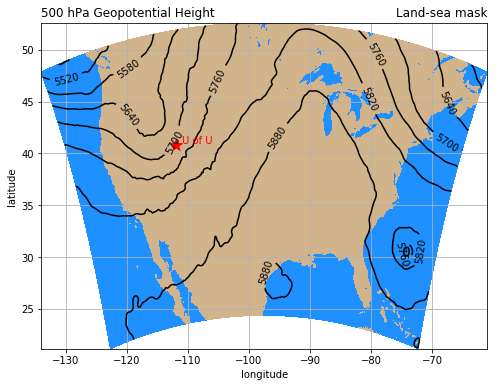

In [34]:
# To georeference the image, you can set the x and y values of the plot as the latitude and longitude from the data file.
# Overlay the geopotential hieght on the Land-Water data.

plt.figure(figsize=[8,6])

# Plot land/water boundaries
plt.contourf(LAND['lon'], LAND['lat'], LAND['value'], levels=[0,.5,1], colors=['dodgerblue','tan'])
plt.title(LAND['name'], loc='right')

# Plot 500 hPa geopotential height
cs = plt.contour(HGT500['lon'], HGT500['lat'], HGT500['value'], colors='k', levels=range(5400,6000,60))
plt.clabel(cs, fmt='%0.0f')

#put a star at Salt Lake City and label as "U of U"
plt.scatter(-111.9, 40.8, marker='*', c='r', s=150)
plt.text(-110.9, 41.0, 'U of U', color='r')

plt.title('500 hPa ' + HGT500['name'], loc='left')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.grid()

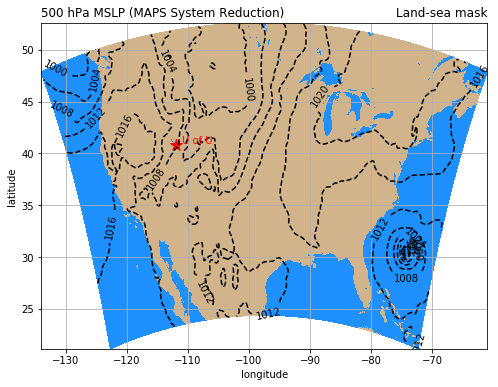

In [35]:
# To georeference the image, you can set the x and y values of the plot as the latitude and longitude from the data file.
# Overlay the geopotential hieght on the Land-Water data.

plt.figure(figsize=[8,6])

# Plot land/water boundaries
plt.contourf(LAND['lon'], LAND['lat'], LAND['value'], levels=[0,.5,1], colors=['dodgerblue','tan'])
plt.title(LAND['name'], loc='right')

# Plot Mean Sea Level Pressure
cs = plt.contour(MSLP['lon'], MSLP['lat'], MSLP['value'], colors='k', levels=range(980,1100,4), linestyles='--')
plt.clabel(cs, fmt='%0.0f')

#put a star at Salt Lake City and label as "U of U"
plt.scatter(-111.9, 40.8, marker='*', c='r', s=150)
plt.text(-110.9, 41.0, 'U of U', color='r')

plt.title('500 hPa ' + MSLP['name'], loc='left')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.grid()

## Exercise: Detail of hurricane:
- use the `plt.xlim()` and `plt.ylim()` to contrain the plot to the hurricane
- create a filled contour of wind gusts
- overlay contour lines of sea level presure.
- Add wind barbs for every 5th grid box if U is the U data, do U[::5]

In [72]:
## Add winb barbs
## Need to be careful, becuase it takes a long time to plot every single barb.
## Below is an example of how to plot every 50th wind barb
#U = np.load('data/HRRR_data/U_wind_10m.npy', allow_pickle=True).item(0)
#V = np.load('data/HRRR_data/V_wind_10m.npy', allow_pickle=True).item(0)
#plt.barbs(U['lon'][::50,::50], U['lat'][::50,::50], U['value'][::50,::50], V['value'][::50,::50])

---
---

# More about datetime

The timdelta submodule can be very useful for doing math operations on dates.

Also, there is some important details for formating dates in this section.

> Personal preference tip: I like to use variables with `DATE` in all caps to indicate it is a python datetime object. For dates that are a string, I like to name variable as `date` in lowercase.

In [37]:
# import two different submodules
from datetime import datetime, timedelta

In [38]:
# Create a new date, the first of this year
# This follows the format `datetime(year, month, day, hour, minute, second)`. Only year, month, and date is required
my_DATE = datetime(2019, 1, 1)
my_DATE

datetime.datetime(2019, 1, 1, 0, 0)

### `timedelta`: How many days has it been since the begining of the year?

In [39]:
now = datetime.now()
now

datetime.datetime(2019, 9, 17, 12, 49, 28, 680417)

In [40]:
now - my_DATE

datetime.timedelta(days=259, seconds=46168, microseconds=680417)

In [41]:
time_diff = now - my_DATE
print('{} days and {:.2f} hours'.format(time_diff.days, time_diff.seconds/3600))

259 days and 12.82 hours


### Make a list of dates incrementing by day

In [42]:
# Given a start and an end date, make a list of all the days in between
sDATE = datetime(2019, 1, 1)
eDATE = datetime(2019, 2, 1)

days = (eDATE-sDATE).days

# List comprehension makes this easy...
DATES = [sDATE + timedelta(days=i) for i in range(days)]

In [43]:
DATES

[datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 2, 0, 0),
 datetime.datetime(2019, 1, 3, 0, 0),
 datetime.datetime(2019, 1, 4, 0, 0),
 datetime.datetime(2019, 1, 5, 0, 0),
 datetime.datetime(2019, 1, 6, 0, 0),
 datetime.datetime(2019, 1, 7, 0, 0),
 datetime.datetime(2019, 1, 8, 0, 0),
 datetime.datetime(2019, 1, 9, 0, 0),
 datetime.datetime(2019, 1, 10, 0, 0),
 datetime.datetime(2019, 1, 11, 0, 0),
 datetime.datetime(2019, 1, 12, 0, 0),
 datetime.datetime(2019, 1, 13, 0, 0),
 datetime.datetime(2019, 1, 14, 0, 0),
 datetime.datetime(2019, 1, 15, 0, 0),
 datetime.datetime(2019, 1, 16, 0, 0),
 datetime.datetime(2019, 1, 17, 0, 0),
 datetime.datetime(2019, 1, 18, 0, 0),
 datetime.datetime(2019, 1, 19, 0, 0),
 datetime.datetime(2019, 1, 20, 0, 0),
 datetime.datetime(2019, 1, 21, 0, 0),
 datetime.datetime(2019, 1, 22, 0, 0),
 datetime.datetime(2019, 1, 23, 0, 0),
 datetime.datetime(2019, 1, 24, 0, 0),
 datetime.datetime(2019, 1, 25, 0, 0),
 datetime.datetime(2019, 1, 26, 0,

---
# Projectile Motion
A classical physics problem is to find the angle a projectile should be launched to achieve the maximum distance.

Reference: [Range of a projectile (Wikipedia)](https://en.wikipedia.org/wiki/Range_of_a_projectile)

\begin{equation}
    d = \frac{v^2}{2g}\left(1+\sqrt{1+\frac{2gy_0}{v^2\sin^2\theta}}\right) \sin2\theta
\end{equation}

In [44]:
def proj_distance(v0, theta, y0=0):
    """
    Calculate the distance of a projectile when launched with speed v0 at angle theta.
    
    Input:
        v0    - initial velocity of the projectile when launched
        theta - angle projectile is launched (in degrees)
        y0    - the initial height of the projectile. Default is 0.
    """
    
    # Gravitational Acceleration
    g = 9.81 # m/s^2
    
    d = (v0**2)/(2*g) * (1 + np.sqrt(1 + (2*g*y0)/(v0**2*np.sin(np.deg2rad(theta))**2)))*np.sin(2*np.deg2rad(theta))
    
    return d

In [45]:
velocity = 15
angle = 30
y0 = 0

distance = proj_distance(velocity, angle, y0)

print('Projectile landed %.1f m away from initial location' % distance)
print('after being launched with velocity %.1f m/s at %.1f degrees at an initial height of %.2f m'  % (velocity, angle, y0))

Projectile landed 19.9 m away from initial location
after being launched with velocity 15.0 m/s at 30.0 degrees at an initial height of 0.00 m


In [46]:
# Range of velocities and angles to test
velocities = np.arange(0,21,.5)
angles = np.arange(0,91,.5)

# Mesh grid: useful to compare all possible combinations of velocities with angles
# Print the values of v and a to see what these look like.
v, a = np.meshgrid(velocities, angles)

# Compute the distance for each
distances = proj_distance(v, a, 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


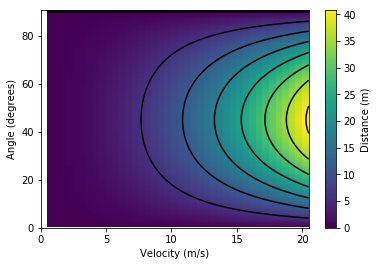

In [47]:
# Plot
plt.pcolormesh(v, a, distances)
cb = plt.colorbar()
cb.set_label('Distance (m)')
plt.xlabel("Velocity (m/s)")
plt.ylabel("Angle (degrees)");

plt.contour(v, a, distances, colors='k')

In [48]:
print('Max distance: %.1f meters' % np.nanmax(distances))
print('--------------------------')
print('       angle: %s degrees' % a[np.where(distances==np.nanmax(distances))])
print('    velocity: %s m/s' % v[np.where(distances==np.nanmax(distances))])

Max distance: 42.8 meters
--------------------------
       angle: [45.] degrees
    velocity: [20.5] m/s


### Exercise #1
Make the distance chart for all negative and positive angles (-90, 90) and for y0 equal to 100 m (i.e. the projectile is on top of a cliff).